# Transformation with Padding

To avoid image shrinking, you may opt to pad your array with `np.nan`.
This is achieved with `np.pad`

In [21]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid

ar = imread("../data/image.jpg")[100:200, 100:200]

## Inspection of GLCM Transformation Size

In [22]:
from glcm_cupy import glcm

radius = 2
step_size = 4
g = glcm(ar, bin_from=256, bin_to=16, radius=radius, step_size=step_size)
print(ar.shape, g.shape)

GLCM Progress: 100%|██████████| 92.9k/92.9k [00:00<00:00, 299k Cells/s]

(100, 100, 3) (88, 88, 3, 7)


Notice that the dimensions reduces by `2 * (step_size + radius)`

We can counter this by adding `np.nan` around the edges of the image.

## Padding with `np.nan`

The following is the recipe to pad an image to retain dimension sizes

In [23]:
padding = radius + step_size
ar_pad = np.pad(ar,
                pad_width=((padding,), (padding,), (0,)),
                constant_values=np.nan)
g = glcm(ar_pad, bin_from=256, bin_to=32, radius=radius, step_size=step_size)
print(ar.shape, g.shape)

GLCM Progress: 100%|██████████| 120k/120k [00:00<00:00, 170k Cells/s] 

(100, 100, 3) (100, 100, 3, 7)


## Plot Transformation

Notice the behaviour of the transformation with padding, this can cause unnatural artifacts along the edges.

Text(0.5, 0.98, 'Padded GLCM Features (Cube Rooted for visibility)')

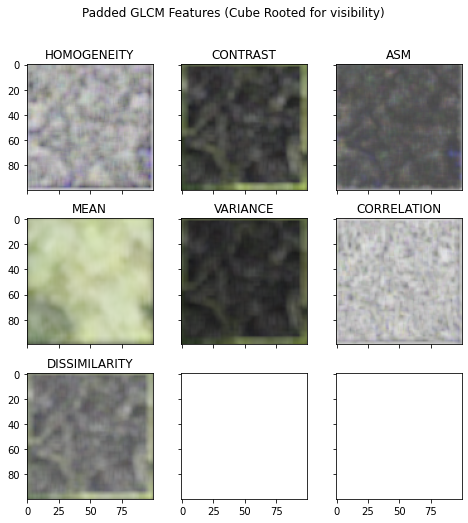

In [24]:
# Plot in a grid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 3),
                 axes_pad=0.4)

for ax, f_ix, title in zip(grid, range(g.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    ax.imshow(g[..., f_ix] ** (1 / 3))
    ax.set_title(title)
fig.suptitle('Padded GLCM Features (Cube Rooted for visibility)')